# EXPLORATORY DATA ANALYSIS ON TERRORISM DATASET

## Loading Libraries

In [3]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import random

## Loading dataset 'terrorism'

In [4]:
raw_data_df = pd.read_csv("C:/B.Tech/datasets/GTD/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')


C:\Users\shant\AppData\Local\Temp\ipykernel_2972\3728037739.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data_df = pd.read_csv("C:/B.Tech/datasets/GTD/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')


## EDA

In [5]:
raw_data_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
raw_data_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
raw_data_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
raw_data_df['imonth'].value_counts

<bound method IndexOpsMixin.value_counts of 0          7
1          0
2          1
3          1
4          1
          ..
181686    12
181687    12
181688    12
181689    12
181690    12
Name: imonth, Length: 181691, dtype: int64>

In [10]:
raw_data_df.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [12]:
raw_data_df.shape

(181691, 135)

## Preprocessing ##

In [13]:

# data cleaning
lat_lng_data = pd.DataFrame(raw_data_df, columns=['latitude', 'longitude'])
clean_data = lat_lng_data.dropna(axis=0, how='any')

# save to CSV
has_header = True # False when uploading to cluster
clean_data.to_csv('clean_data.csv', columns = ["latitude", "longitude"], index=False, header=has_header)

In [14]:
clean_data_df = pd.read_csv("C:/Users/shant/OneDrive/Documents/GitHub/Global-Terrorism-Database-K-Means/clean_data.csv")
clean_lats = clean_data_df['latitude']
clean_lons = clean_data_df['longitude']
lats = clean_lats.tolist()
lons = clean_lons.tolist()

In [15]:
clean_data_df.head()

,latitude,longitude
0,18.456792,-69.951164
1,19.371887,-99.086624
2,15.478598,120.599741
3,37.997490,23.762728
4,33.580412,130.396361


Now, set centroids

In [16]:
# k different centroids
k = 5

# colors = ['y', 'y', 'y', 'y', 'y', 'y', 'k']
centroid_1 = (2.361956292733226, 29.36602923946585)
centroid_2 = (9.207740262716625, 115.80481474889932)
centroid_3 = (28.406414022007812, 74.12808393025578)
centroid_4 = (3.2801139683765075, -79.74785539671865)
centroid_5 = (38.414250505940146, 28.417748608803993)
centroids = [centroid_1, centroid_2, centroid_3, centroid_4, centroid_5]

## Create the map

{-90: ([<matplotlib.lines.Line2D at 0x258f29715d0>], []),
 -60: ([<matplotlib.lines.Line2D at 0x258f2971810>], []),
 -30: ([<matplotlib.lines.Line2D at 0x258f2971ab0>], []),
 0: ([<matplotlib.lines.Line2D at 0x258f2971d50>], []),
 30: ([<matplotlib.lines.Line2D at 0x258f2971ff0>], []),
 60: ([<matplotlib.lines.Line2D at 0x258f2972290>], [])}

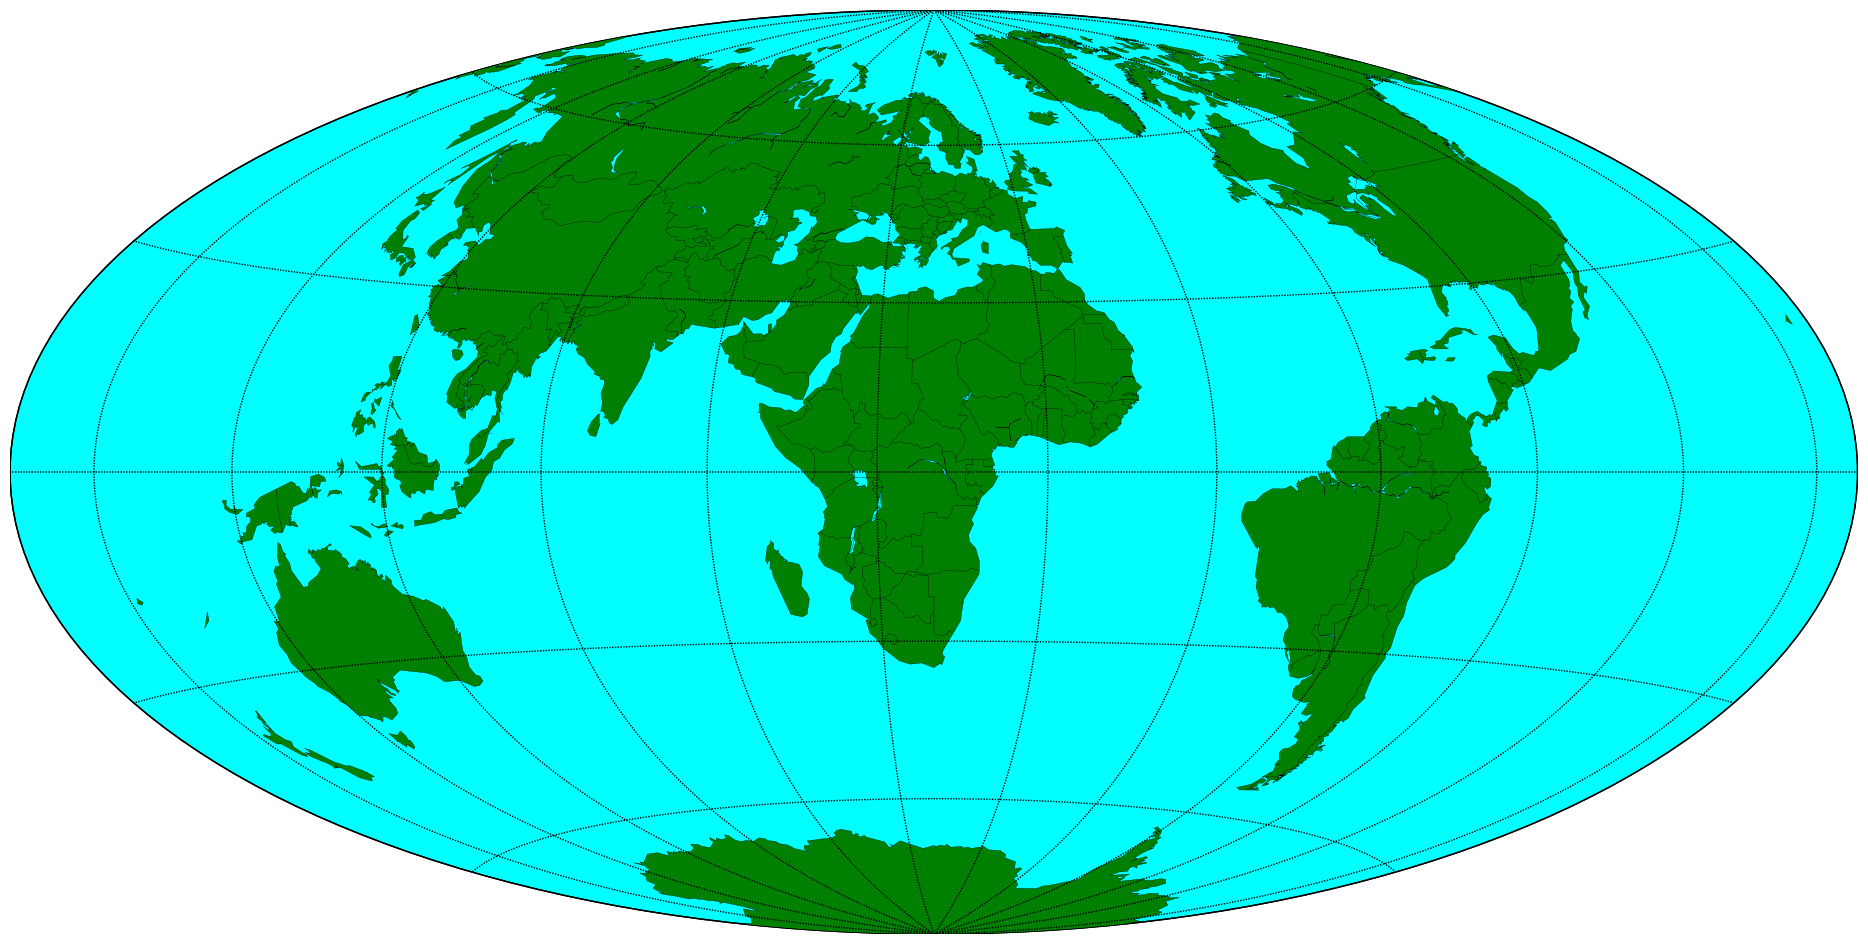

In [17]:
plt.figure(figsize=(24,12))
map = Basemap(projection='hammer',lon_0=20,resolution='c')
# map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
 
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='green',lake_color='aqua')

map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

### Post-processing ###

In [18]:
### get clusters
cluster_file = open('clusters.txt','r')
lines = cluster_file.readlines()
clusters = dict()
for i in range(k):
    clusters[i] = []

colors = ['b', 'k', 'r', 'm', 'y', 'g', 'c']
for line in lines:
    entries = line.split(', ')
    entries = [entry.strip('()') for entry in entries]
    entries = [entry.replace("))\n", "") for entry in entries]
    index, lat, lng = entries
    clusters[int(index)].append((lat, lng))

centroid_colors = zip(centroids, colors)

## Plotting ##

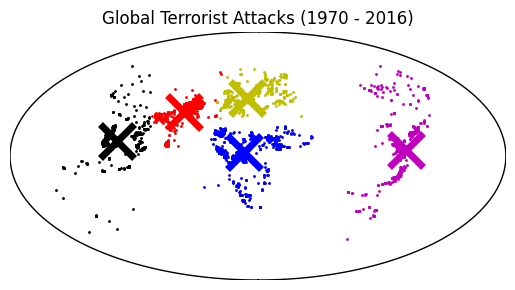

In [19]:
# plot clusters
for centroid_idx in range(k):
    cluster = clusters[centroid_idx]
    num_samples = 1000
    random_samples = random.sample(cluster, num_samples)
    for (lat, lon) in random_samples:
        x, y = map(lon, lat)
        color = colors[centroid_idx]
        marker_style = color + 'o'
        map.plot(x, y, marker_style, markersize=1.05)

# plot centroids
for (lat, lon), color in centroid_colors:
    x,y = map(lon, lat)
    marker_style = color + 'x'
    map.plot(x, y, marker_style, markersize=25, mew=5)

title_string = "Global Terrorist Attacks (1970 - 2016)"
plt.title(title_string)

plt.show()

## Create map of all terrorist attacks

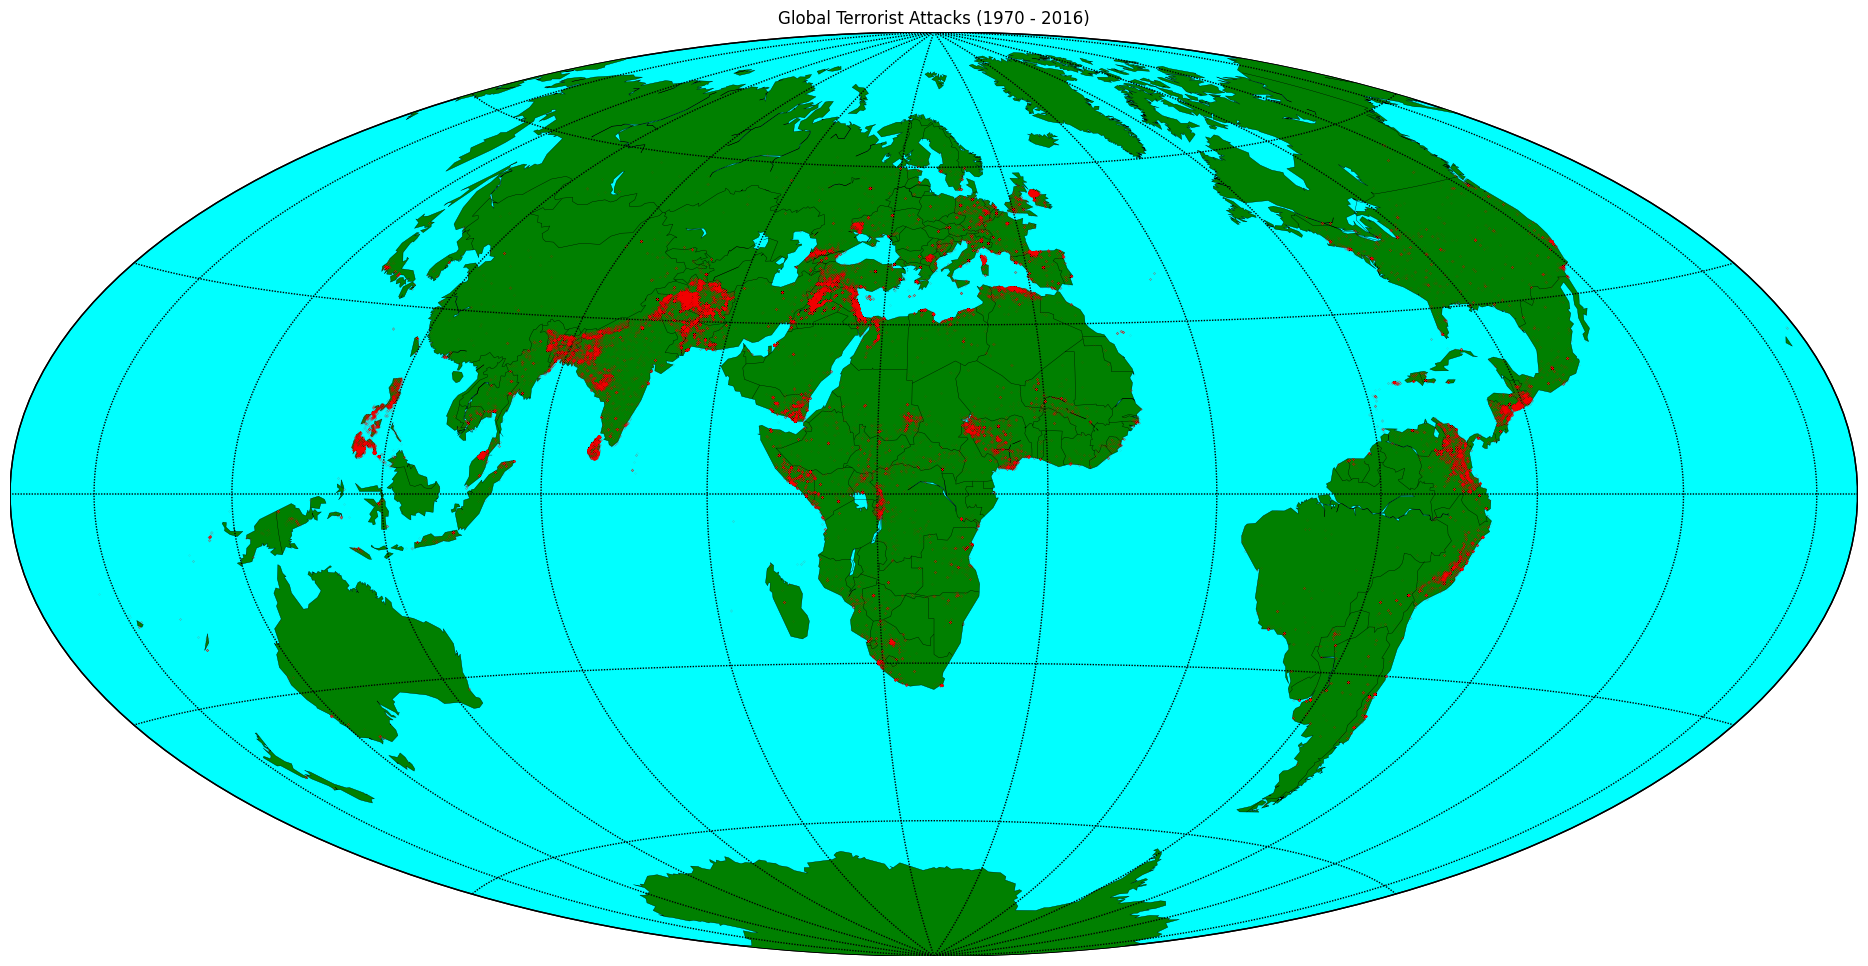

In [20]:
plt.figure(figsize=(24,12))
map = Basemap(projection='hammer',lon_0=20)
 
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='green',lake_color='aqua')

map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

x,y = map(lons, lats)
map.plot(x, y, 'ro', markersize=.05)

title_string = "Global Terrorist Attacks (1970 - 2016)"
plt.title(title_string)

plt.show()

## Create Map of only centroids

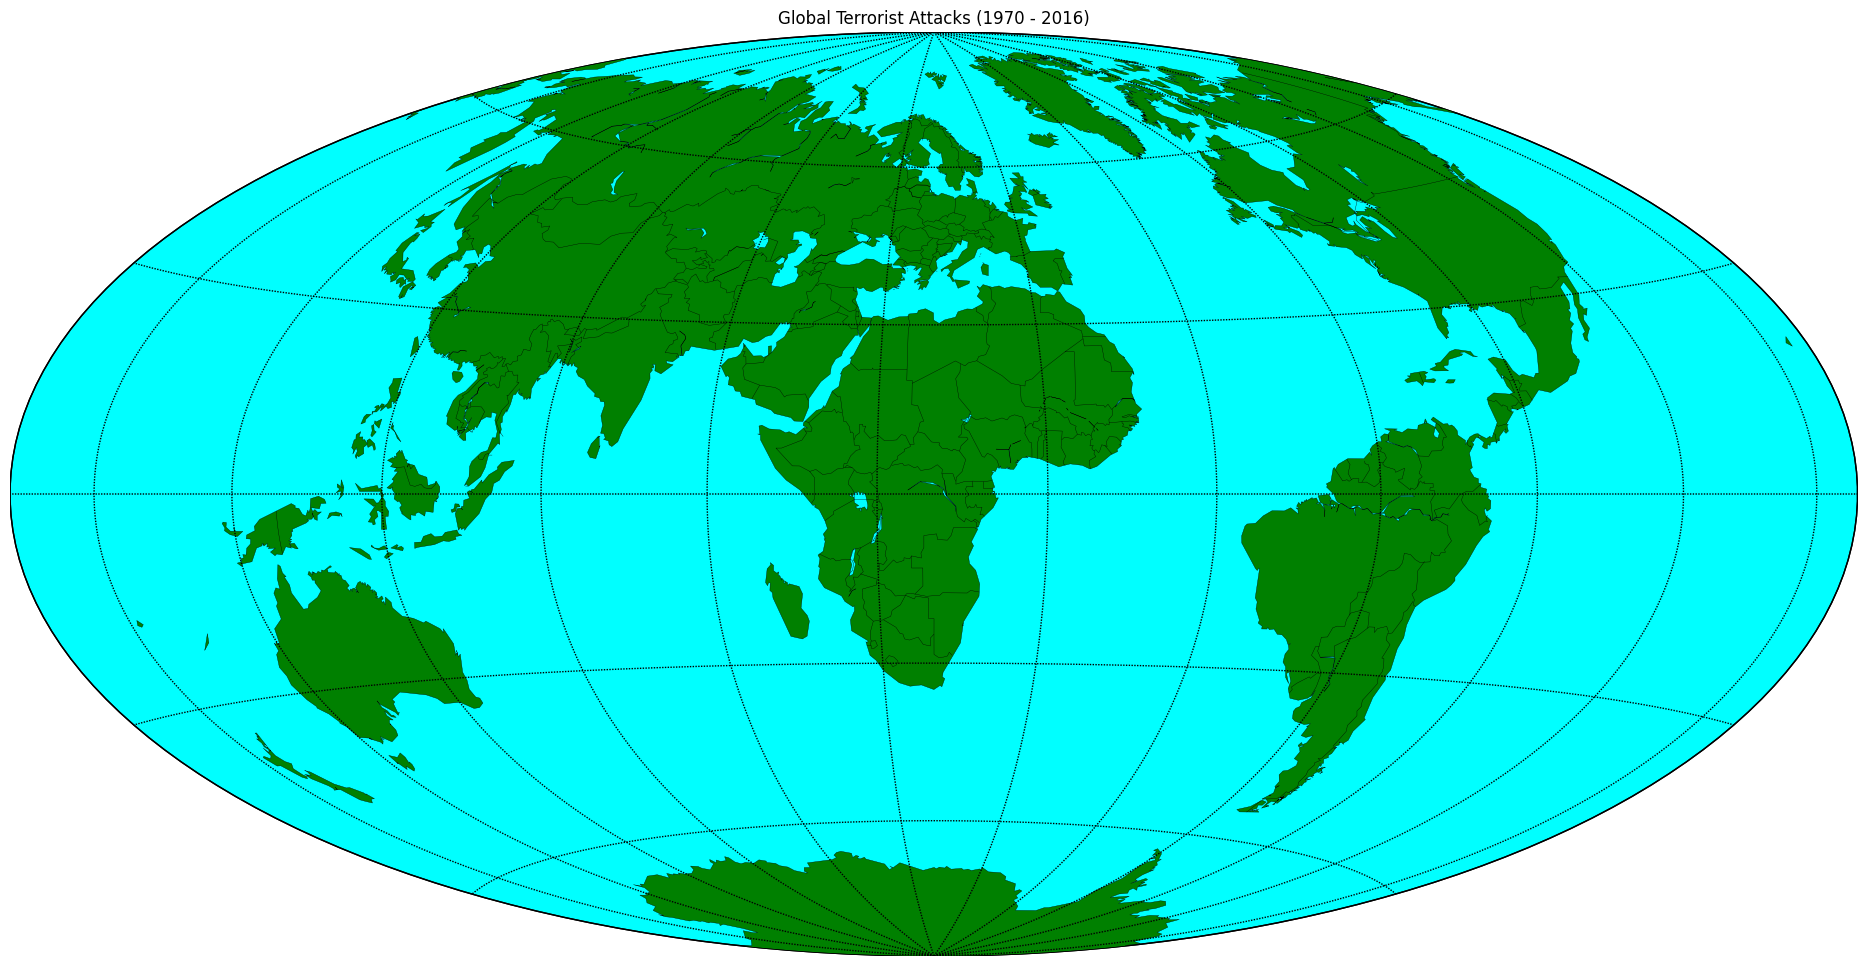

In [21]:
plt.figure(figsize=(24,12))
map = Basemap(projection='hammer',lon_0=20)
# map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
 
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='green',lake_color='aqua')

map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# plot centroids
for (lat, lon), color in centroid_colors:
    x,y = map(lon, lat)
    marker_style = 'rx'
    map.plot(x, y, marker_style, markersize=25, mew=5)
title_string = "Global Terrorist Attacks (1970 - 2016)"
plt.title(title_string)

plt.show()